In [1]:
import pandas as pd
import numpy as np          
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
ol=pd.read_csv("D:/Datasets/athlete_events.csv")

In [5]:
noc=pd.read_csv("D:/Datasets/noc_regions.csv")

In [6]:
ol.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
ol.nunique()

ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
dtype: int64

In [9]:
noc.nunique()

NOC       230
region    206
notes      21
dtype: int64

In [10]:
# Merging the data with Left join
data = pd.merge(ol,noc,how='left',on='NOC')

In [11]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [12]:
data.nunique()

ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
region       205
notes         21
dtype: int64

In [13]:
data.shape

(271116, 17)


# **1. Handle null values in dataset and remove unwanted symbols if any.**

In [14]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [15]:
percent= data.isnull().sum() * 100 / len(data)
print(percent)

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.494445
Height    22.193821
Weight    23.191180
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.326207
region     0.136473
notes     98.141386
dtype: float64


There are lot of nulls in "Medal" Column. so I'm filling those with "No Data"




<AxesSubplot:>

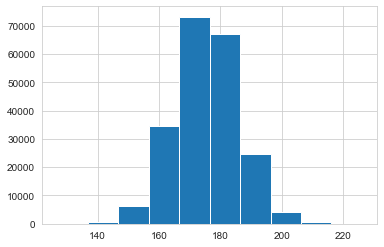

In [16]:
data['Height'].hist()

In [17]:
data['Height']= data['Height'].fillna(data['Height'].mean())


<AxesSubplot:>

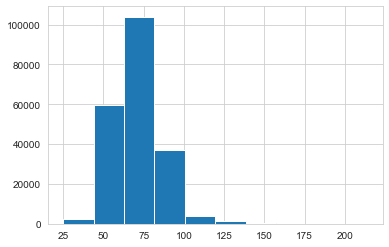

In [18]:
data['Weight'].hist()

In [19]:
data['Weight']= data['Weight'].fillna(data['Weight'].mean())

In [20]:
data['Medal'].fillna('No Data', inplace = True)

In [21]:
data['Medal'].head()

0    No Data
1    No Data
2    No Data
3       Gold
4    No Data
Name: Medal, dtype: object

In [22]:
data['Age']= data['Age'].fillna(data['Age'].mean())

In [23]:
data['notes'].fillna('No Data', inplace = True)

In [24]:
data['region'].fillna('No Data', inplace = True)

In [25]:
percent= data.isnull().sum() * 100 / len(data)
print(percent)

ID        0.0
Name      0.0
Sex       0.0
Age       0.0
Height    0.0
Weight    0.0
Team      0.0
NOC       0.0
Games     0.0
Year      0.0
Season    0.0
City      0.0
Sport     0.0
Event     0.0
Medal     0.0
region    0.0
notes     0.0
dtype: float64


In [26]:
import string
alphabet = string.ascii_letters+string.punctuation

In [27]:
data.Team.str.strip(alphabet).astype(bool).any()

True

In [28]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    data['Team'] = data['Team'].str.replace(char, ' ')

**2. What is the unique count of sports, events, and different city, and the team participated in the Olympics.**

In [29]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [30]:
print("Uniue no of sports", data["Sport"].nunique())
print("Uniue no of Event", data["Event"].nunique())
print("Uniue no of City", data["City"].nunique())
print("Uniue no of Team", data["Team"].nunique())

Uniue no of sports 66
Uniue no of Event 765
Uniue no of City 42
Uniue no of Team 1184


**3. What is the total count of players from the United States, China Netherland, Spain, France, Italy?**

In [31]:
print("count of players from the United States", data['Team'].value_counts()['United States'])
print("count of players from the China", data['Team'].value_counts()['China'])
print("count of players from the Netherland", data['Team'].value_counts()['Netherlands'])
print("count of players from the Spain", data['Team'].value_counts()['Spain'])
print("count of players from the France", data['Team'].value_counts()['France'])
print("count of players from the Italy", data['Team'].value_counts()['Italy'])

count of players from the United States 17847
count of players from the China 4975
count of players from the Netherland 5718
count of players from the Spain 5224
count of players from the France 11988
count of players from the Italy 10260


**4. What is the average age of female and male players from the United States, China, Netherland, Spain, France, Italy**

In [32]:
df=data[data['Team'].isin(["United States","China","Netherlands", "Spain", "France", "Italy"])]
pivot=pd.pivot_table(df, values='Age', index='Team', columns="Sex", aggfunc=lambda x:np.mean(x))
pivot

Sex,F,M
Team,,
China,22.323606,23.703702
France,24.207555,27.234547
Italy,23.537550,26.451548
Netherlands,24.114383,27.770762
Spain,23.227857,25.960554
United States,24.455439,26.563762


### **5. What are the different kinds of sports in which players have participated in different cities of the United States.**

In [33]:
df2=data[data['Team']=="United States"]
df2.groupby(['City'])['Sport'].unique()

City
Albertville               [Cross Country Skiing, Freestyle Skiing, Biath...
Amsterdam                 [Athletics, Fencing, Football, Art Competition...
Antwerpen                 [Wrestling, Shooting, Athletics, Diving, Eques...
Athina                    [Wrestling, Taekwondo, Athletics, Rowing, Voll...
Atlanta                   [Handball, Athletics, Archery, Sailing, Tennis...
Barcelona                 [Baseball, Swimming, Shooting, Football, Cycli...
Beijing                   [Softball, Athletics, Synchronized Swimming, S...
Berlin                    [Rowing, Handball, Athletics, Fencing, Footbal...
Calgary                   [Alpine Skiing, Speed Skating, Cross Country S...
Chamonix                  [Ice Hockey, Ski Jumping, Speed Skating, Cross...
Cortina d'Ampezzo         [Figure Skating, Ice Hockey, Alpine Skiing, Sp...
Garmisch-Partenkirchen    [Cross Country Skiing, Ski Jumping, Alpine Ski...
Grenoble                  [Alpine Skiing, Speed Skating, Ski Jumping, No...
Helsink

**6. What are the names of players who have brought gold, silver and bronze medal?**

In [34]:
df3=data[data['Medal']!="No Data"]
df3.groupby(["Medal"])["Name"].unique()

Medal
Bronze    [Arvo Ossian Aaltonen, Juhamatti Tapio Aaltone...
Gold      [Edgar Lindenau Aabye, Paavo Johannes Aaltonen...
Silver    [Kjetil Andr Aamodt, Alf Lied Aanning, Pepijn ...
Name: Name, dtype: object

**7. Which team has brought the most number of female and male players?**

In [35]:
dfF=data[data["Sex"]=="F"].groupby(['Sex','Team']).size().to_frame('count').sort_values(by='count',ascending=False).reset_index()
print("Most of the female members are from ")
dfF.head(1)

Most of the female members are from 


,Sex,Team,count
0,F,United States,5368


In [36]:
dfM=data[data["Sex"]=="M"].groupby(['Sex','Team']).size().to_frame('count').sort_values(by='count',ascending=False).reset_index()
print("Most of the male members are from ")
dfM.head(1)

Most of the male members are from 


,Sex,Team,count
0,M,United States,12479


**8. Draw a suitable graph which depicts different events took place from 1900 to 2016.**

In [37]:
data["Year"].nunique()

35

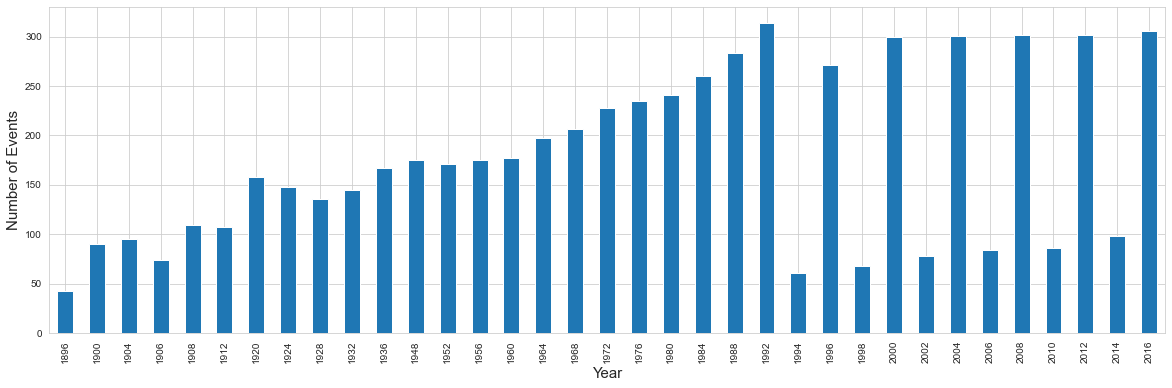

In [38]:
ax = data.groupby('Year')['Event'].nunique().plot(kind='bar',color=color[0],figsize=(20,6))
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('Number of Events',fontsize=15)
plt.show()

**9. What are the different sports played in a different season?**

In [39]:
df5=pd.DataFrame(data.groupby(['Season'])['Sport'].unique())
df5.transpose()

Season,Summer,Winter
Sport,"[Basketball, Judo, Football, Tug-Of-War, Athle...","[Speed Skating, Cross Country Skiing, Ice Hock..."


**10. What are the average height and weight of players who participated in football, Judo,basketball?**

In [40]:
df6=data[data['Sport'].isin(["Football","Judo","Basketball"])]
print("The average height and weight of players who participated in football, Judo,basketball is - ")
df6[["Height", "Weight"]].mean()

The average height and weight of players who participated in football, Judo,basketball is - 


Height    179.095353
Weight     76.142799
dtype: float64

**11. How many sports and events were player in 1992 winter, 1994 winter 2000 summer 2002 winter**

In [41]:
df7=data[data['Games'].isin(["1992 winter","1994 winter","2000 summer", "2002 winter"])]
print("The number of sports and events were played in 1992 winter, 1994 winter 2000 summer 2002 winter - ")
df6[["Sport", "Event"]].nunique()

The number of sports and events were played in 1992 winter, 1994 winter 2000 summer 2002 winter - 


Sport     3
Event    19
dtype: int64

**12. List the names of players who brought gold, silver and bronze medal.**

In [42]:
Gold=data[data['Medal']=="Gold"]
print("Names of players who brought gold - ")
Gold["Name"].tolist()

Names of players who brought gold - 


['Edgar Lindenau Aabye',
 'Paavo Johannes Aaltonen',
 'Paavo Johannes Aaltonen',
 'Paavo Johannes Aaltonen',
 'Kjetil Andr Aamodt',
 'Kjetil Andr Aamodt',
 'Kjetil Andr Aamodt',
 'Kjetil Andr Aamodt',
 'Ragnhild Margrethe Aamodt',
 'Roald Edgar Aas',
 'Thomas Valentin Aas',
 'Ren Abadie',
 'Aleksey Aleksandrovich Abalmasov',
 'Luc Abalo',
 'Luc Abalo',
 'Jouan Patrice Abanda Etong',
 'Jos Mara Abarca Plotas',
 'Alejandro Abascal Garca',
 'Jol Marc Abati',
 'Agostino Abbagnale',
 'Agostino Abbagnale',
 'Agostino Abbagnale',
 'Carmine Abbagnale',
 'Carmine Abbagnale',
 'Giuseppe Abbagnale',
 'Giuseppe Abbagnale',
 'Margaret Ives Abbott (-Dunne)',
 'Lala Abdul Rashid',
 'Zagalav Abdulbekovich Abdulbekov',
 'Mukhammad Kadyr Abdullayev',
 'Namiq Yadulla Abdullayev',
 'Julius Shareef Abdur-Rahim',
 'Andrey Khakimovich Abduvaliyev',
 'Masashi Abe',
 'George Gordon Abel',
 'Abelardo Fernndez Antua',
 'Louis Grenville "Lou" Abell',
 'Louis Grenville "Lou" Abell',
 'Gezahgne Abera',
 'Michael Br

In [43]:
Silver=data[data['Medal']=="Silver"]
print("Names of players who brought silver - ")
Silver["Name"].tolist()

Names of players who brought silver - 


['Kjetil Andr Aamodt',
 'Kjetil Andr Aamodt',
 'Alf Lied Aanning',
 'Pepijn Aardewijn',
 'Karl Jan Aas',
 'Mariya Vasilyevna Abakumova (-Tarabina)',
 'Luc Abalo',
 'Stephen Anthony Abas',
 'Tamila Rashidovna Abasova',
 'Pter Abay',
 'Carmine Abbagnale',
 'Giuseppe Abbagnale',
 'Monica Cecilia Abbott',
 'Nia Nicole Abdallah',
 'Muhammad Abdul Rashid',
 'Namiq Yadulla Abdullayev',
 'Yusup Abdusalomov',
 'Max "Xam" Abegglen',
 'Clarence John Abel',
 'Irene Abel',
 'Egil Sten Abel',
 'Nils Georg berg',
 'Elvan Abeylegesse',
 'Denis Mikhaylovich Ablyazin',
 'Denis Mikhaylovich Ablyazin',
 'Denis Mikhaylovich Ablyazin',
 'Viktor Andreyevich Aboimov',
 'Alaaeldin Ahmad El-Sayyid Abouelkassem',
 'Attila brahm',
 'Ara Abrahamian',
 'Harold Maurice Abrahams',
 'Karl Gustaf Emanuel Abrahamsson',
 'Nelli Mikhaylovna Abramova',
 'Domingo Gmez-Acedo Villanueva',
 'Daniel Aceves Villagrn',
 'Alfred Achermann',
 'Chantal Achterberg',
 'Ronny Ackermann',
 'Ronny Ackermann',
 'Ronny Ackermann',
 'Donat 

In [44]:
Bronze=data[data['Medal']=="Bronze"]
print("Names of players who brought Bronze - ")
Bronze["Name"].tolist()

Names of players who brought Bronze - 


['Arvo Ossian Aaltonen',
 'Arvo Ossian Aaltonen',
 'Juhamatti Tapio Aaltonen',
 'Paavo Johannes Aaltonen',
 'Paavo Johannes Aaltonen',
 'Kjetil Andr Aamodt',
 'Kjetil Andr Aamodt',
 'Willemien Aardenburg',
 'Ann Kristin Aarnes',
 'Roald Edgar Aas',
 'Giovanni Abagnale',
 'Jos Luis Abajo Gmez',
 'Patimat Abakarova',
 'Jos Manuel Abascal Gmez',
 'Oszkr Abay-Nemes',
 'Silvano Abba',
 'George "Ioannis" Abbot',
 'Desmond "Des" Abbott',
 'Jeremy Abbott',
 'Saeid Morad Abdevali',
 'Reema Abdo',
 'Addis Abebe',
 'Jennifer Abel',
 'Nils Georg berg',
 'Moira Abernethy (-Ford)',
 'Denis Mikhaylovich Ablyazin',
 'Denis Mikhaylovich Ablyazin',
 'Viktor Andreyevich Aboimov',
 'Matthew "Matt" Abood',
 'Attila brahm',
 'Gary Abraham',
 'Erik Adolf Efraim Abrahamsson',
 'Pavel Sergeyevich Abramov',
 'Yekaterina Konstantinovna Abramova',
 'Alejandro "lex" Abrines Redondo',
 'Svetlana Olegovna Abrosimova',
 'Ginko Abukawa-Chiba',
 'Aleksandr Veniaminovich Abushakhmetov',
 'Andreea Roxana Acatrinei',
 'Pa

**13. What is the highest number of sports played in the year 1990, 1992, 1994, 2016?**

In [45]:
df1990=data[data["Year"]==1990].groupby(['Year','Sport']).size().to_frame('nunique').sort_values(by='nunique',ascending=False).reset_index()
print("Sports played in 1990 ")
df1990.head(1)

Sports played in 1990 


,Year,Sport,nunique


In [46]:
df1992=data[data["Year"]==1992].groupby(['Year','Sport']).size().to_frame('nunique').sort_values(by='nunique',ascending=False).reset_index()
print("Sports played in 1992 ")
df1990.head(1)

Sports played in 1992 


,Year,Sport,nunique


In [47]:
df1994=data[data["Year"]==1994].groupby(['Year','Sport']).size().to_frame('nunique').sort_values(by='nunique',ascending=False).reset_index()
print("Sports played in 1994 ")
df1994.head(1)

Sports played in 1994 


,Year,Sport,nunique
0,1994,Cross Country Skiing,639


In [48]:
df2016=data[data["Year"]==2016].groupby(['Year','Sport']).size().to_frame('nunique').sort_values(by='nunique',ascending=False).reset_index()
print("Sports played in 2016 ")
df2016.head(1)

Sports played in 2016 


,Year,Sport,nunique
0,2016,Athletics,2508


**14. What are the different sports played by female players? In which sport most numbers of female players have participated. Visualize the same**

In [49]:
dfF=data[data["Sex"]=="F"].groupby("Sport").size().to_frame('nunique').reset_index()
dfF

,Sport,nunique
0,Alpine Skiing,3398
1,Alpinism,1
2,Archery,1015
3,Art Competitions,377
4,Athletics,11666
5,Badminton,740
6,Basketball,1256
7,Beach Volleyball,276
8,Biathlon,1863
9,Bobsleigh,143


<AxesSubplot:xlabel='nunique', ylabel='Sport'>

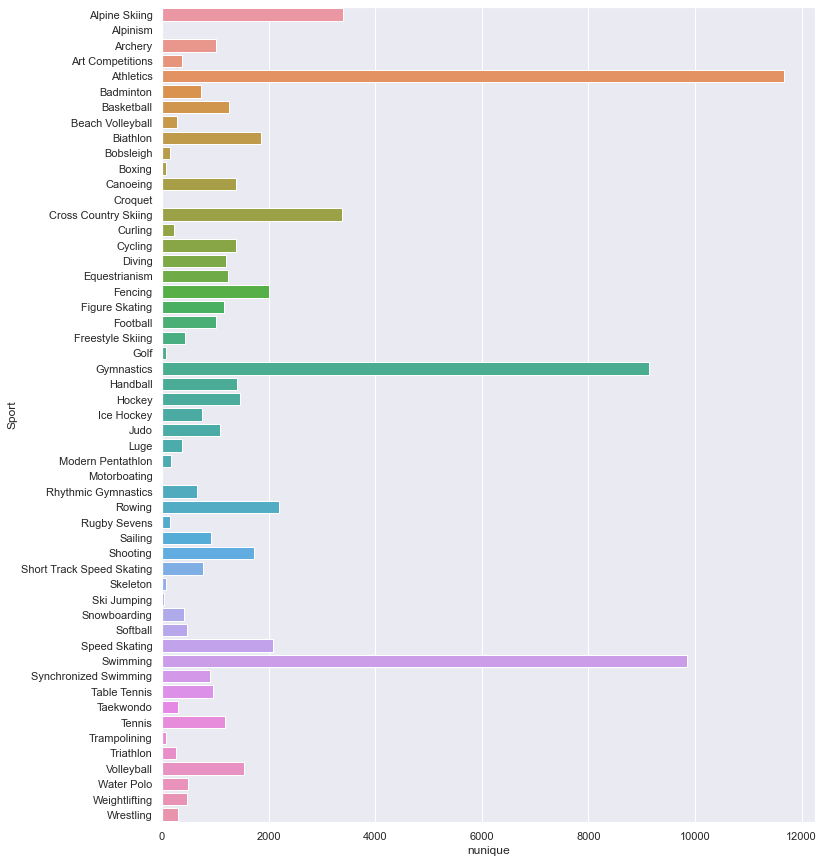

In [50]:
sns.set(rc={'figure.figsize':(11.7,15)})
sns.barplot(y=dfF["Sport"], x=dfF["nunique"], data=dfF, orient="h")

In athlatics sport most numbers of female players have participated

**15. Perform the above problem for male players as well.**

In [51]:
dfM=data[data["Sex"]=="M"].groupby("Sport").size().to_frame('nunique').reset_index()
dfM

,Sport,nunique
0,Aeronautics,1
1,Alpine Skiing,5431
2,Alpinism,24
3,Archery,1319
4,Art Competitions,3201
...,...,...
58,Tug-Of-War,170
59,Volleyball,1861
60,Water Polo,3358
61,Weightlifting,3474


<AxesSubplot:xlabel='nunique', ylabel='Sport'>

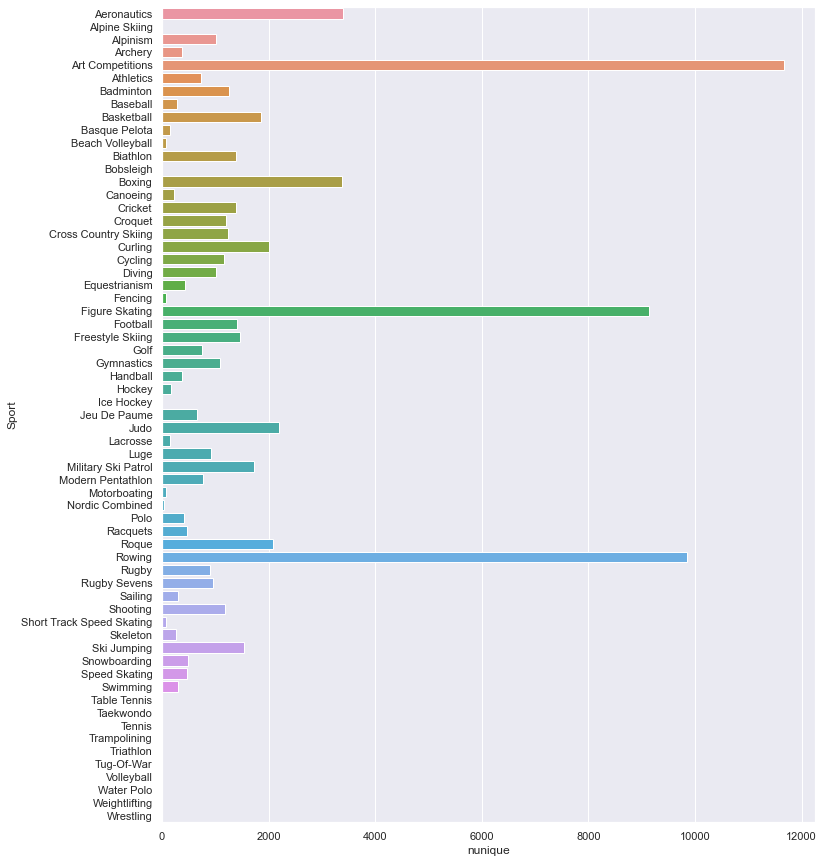

In [52]:
sns.set(rc={'figure.figsize':(11.7,15)})
sns.barplot(y=dfM["Sport"], x=dfF["nunique"], data=dfM, orient="h")

In art compitition sport most numbers of male players have participated

**16. Which city has the maximum number of players?**

In [53]:
dfcity=data.groupby(['City']).size().to_frame('nunique').sort_values(by='nunique',ascending=False).reset_index()
print("This city has the maximum number of players")
dfcity.head(1)

This city has the maximum number of players


,City,nunique
0,London,22426


**17. Show line chart which tells variation in a number of players from 1990 to 2000 of India and Pakistan. (Draw separate chart for India and Pakistan**

In [54]:
Ind=data[data["Team"]=="India"]
Ind=Ind[Ind["Year"].between(1990,2000)]
Ind.groupby('Year')['Name'].count()

Year
1992    65
1996    54
1998     1
2000    70
Name: Name, dtype: int64

Text(0.5, 0, 'variation in a number of players from 1990 to 2000 of India')

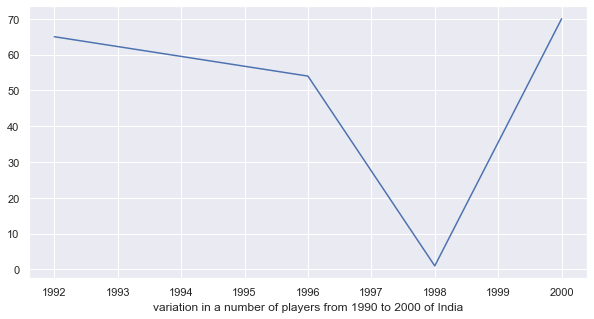

In [55]:
Ind.groupby('Year')['Name'].count().plot(figsize=(10,5))
plt.xlabel('variation in a number of players from 1990 to 2000 of India')

In [56]:
pak=data[data["Team"]=="Pakistan"]
pak=pak[pak["Year"].between(1990,2000)]
pak.groupby('Year')['Name'].count()

Year
1992    28
1996    24
2000    27
Name: Name, dtype: int64

Text(0.5, 0, 'variation in a number of players from 1990 to 2000 of Pakistan')

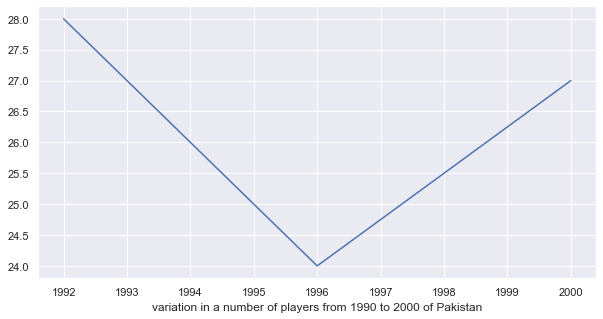

In [57]:
pak.groupby('Year')['Name'].count().plot(figsize=(10,5))
plt.xlabel('variation in a number of players from 1990 to 2000 of Pakistan')

**18. Draw a pie chart to show the percentage of male and female players across the world**

In [58]:
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'

Text(0.5, 0, 'percentage of male and female players across the world')

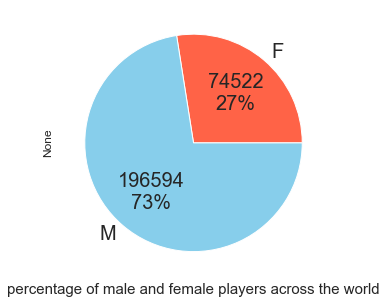

In [59]:
plt.figure(figsize = (5, 5))
data.groupby('Sex').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},colors=['Tomato', 'skyblue'])
plt.xlabel('percentage of male and female players across the world', size=15)

**19. Which team has won the maximum number of gold, silver and bronze? Visualize the same**

In [60]:
Gold=data[data["Medal"]=="Gold"].groupby(['Medal','Team']).size().to_frame('nunique').sort_values(by='nunique',ascending=False).reset_index()
print("Max Gold own by ")
Gold.head(1)

Max Gold own by 


,Medal,Team,nunique
0,Gold,United States,2474


In [61]:
SV=data[data["Medal"]=="Silver"].groupby(['Medal','Team']).size().to_frame('nunique').sort_values(by='nunique',ascending=False).reset_index()
print("Max Siver own by ")
SV.head(1)

Max Siver own by 


,Medal,Team,nunique
0,Silver,United States,1512


In [62]:
BZ=data[data["Medal"]=="Bronze"].groupby(['Medal','Team']).size().to_frame('nunique').sort_values(by='nunique',ascending=False).reset_index()
print("Max Bronze own by ")
BZ.head(1)

Max Bronze own by 


,Medal,Team,nunique
0,Bronze,United States,1233


In [63]:
medal=data[data["Medal"]!="No Data"].groupby(["Medal","Team"]).size().to_frame('value_counts').sort_values(by='value_counts',ascending=False).reset_index()
medal

,Medal,Team,value_counts
0,Gold,United States,2474
1,Silver,United States,1512
2,Bronze,United States,1233
3,Gold,Soviet Union,1058
4,Silver,Soviet Union,716
...,...,...,...
778,Gold,Israel,1
779,Bronze,Suriname,1
780,Silver,Israel,1
781,Bronze,Syria,1


In [64]:

medal1=pd.pivot(medal[:100], index="Team", columns="Medal", values="value_counts")
medal1

Medal,Bronze,Gold,Silver
Team,,,
Argentina,91.0,91.0,84.0
Australia,511.0,342.0,453.0
Austria,150.0,95.0,168.0
Belgium,154.0,94.0,161.0
Brazil,185.0,103.0,161.0
Bulgaria,144.0,NaN,144.0
Canada,408.0,422.0,413.0
China,268.0,308.0,325.0
Cuba,116.0,164.0,127.0


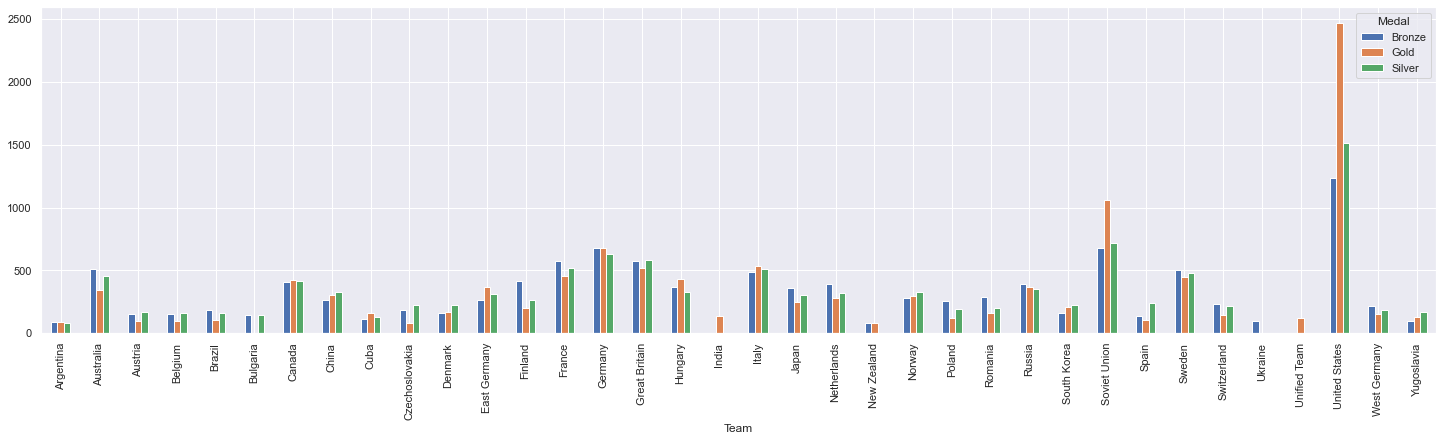

In [65]:
ax=medal1.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(25, 6)

**20. Who is the tallest and shortest player?**

In [66]:
tallest=data["Height"].max()
tallest
print("Tallest players -")
data[data["Height"]== tallest]["Name"]


Tallest players -


265040    Yao Ming
265041    Yao Ming
265042    Yao Ming
Name: Name, dtype: object

In [67]:
shortest=data["Height"].min()
shortest
print("Shortest players -")
data[data["Height"]== shortest]["Name"]


Shortest players -


29333           Rosario Briones
29334           Rosario Briones
29335           Rosario Briones
29336           Rosario Briones
29337           Rosario Briones
29338           Rosario Briones
164821    Lyton Levison Mphande
Name: Name, dtype: object